In [1]:
from imports import *
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates



In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')

df.shape

(1229, 3)

<AxesSubplot:>

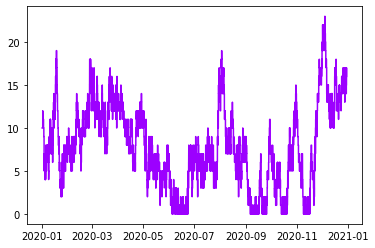

In [3]:
vsteps.plot()

In [4]:
data = vsteps.step_keys()
dt_deltas = np.diff(data)
dt_deltas = [d.total_seconds()/60 for d in dt_deltas]


<AxesSubplot:ylabel='Count'>

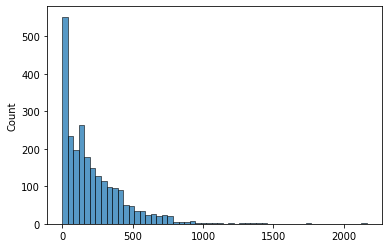

In [5]:
sns.histplot(x=dt_deltas)

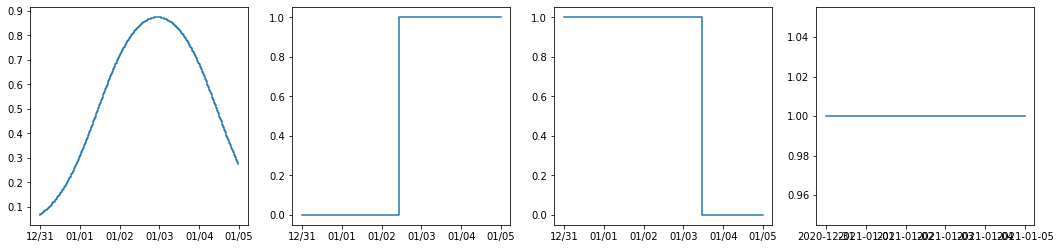

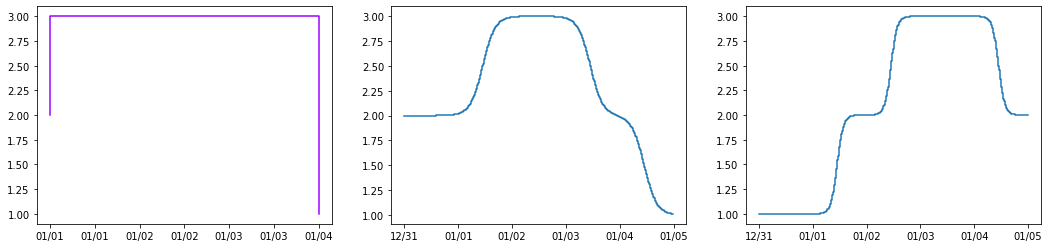

In [6]:
t = np.arange(pd.Timestamp(2020,12,31),pd.Timestamp(2021,1,5),pd.Timedelta(minutes=15)).astype(pd.Timestamp)

fig,ax = plt.subplots(ncols=4, figsize=(18,4))
fig2,ax2 = plt.subplots(ncols=3, figsize=(18,4))

s1 = Step(end=pd.Timestamp(2021,1,3))
s1a = Step(use_datetime=True)

s2 = Step(start=pd.Timestamp(2021,1,1),end=pd.Timestamp(2021,1,4))
s3 = Step(start=pd.Timestamp(2021,1,2))

st =Steps(use_datetime=True).add([s1,s1a,s2])
sta =Steps(use_datetime=True).add([s1a,s3,s2])

ax[0].step(t,s2.smooth_step(t,smooth_factor=200))
ax[1].step(t,s3(t))
ax[2].step(t,s1(t))
ax[3].step(t,s1a(t))

st.plot(ax=ax2[0])
ax2[1].step(t,st.smooth_step(t,smooth_factor=20000))
ax2[2].step(t,sta.smooth_step(t,smooth_factor=10000))

date_form = DateFormatter('%m/%d')
ax[0].xaxis.set_major_formatter(date_form)
ax[1].xaxis.set_major_formatter(date_form)
ax[2].xaxis.set_major_formatter(date_form)

ax2[0].xaxis.set_major_formatter(date_form)
ax2[1].xaxis.set_major_formatter(date_form)
ax2[2].xaxis.set_major_formatter(date_form)



In [7]:
st

2021-01-03 00:00:00:1,1677-09-21 00:12:43.145225:1,2021-01-01 00:00:00:1:2021-01-04 00:00:00:-1,2021-01-04 00:00:00:-1

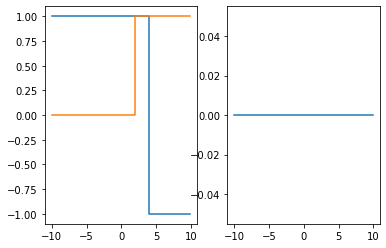

In [8]:
#import cupy as cp
fig,ax = plt.subplots(ncols=2)
t = np.arange(-10,10,0.1)
si = Step(end=4,weight=(1,-1))
sp = Step(start=2)

ax[0].step(t,(si)(t))
ax[0].step(t,sp(t))
ax[1].step(t,(si*sp)(t))
